In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
cols = ['target','id','date','flag','user','text']

In [ ]:

# Try using the 'error_bad_lines' parameter to skip problematic rows
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1',
                 names=cols,
                 on_bad_lines='skip')  # or on_bad_lines='warn' to get warnings

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
for i in df['text'][:5] :
  print(i)
  print('\n')

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds


my whole body feels itchy and like its on fire 


@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 




In [ ]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


<Axes: xlabel='target'>

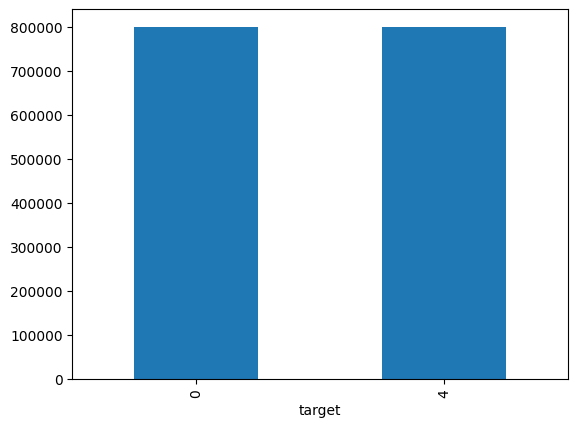

In [ ]:
df['target'].value_counts().plot(kind = 'bar')


- 0 represents negative tweet
- 4 represents positive tweet

**converting 4 to 1**

In [ ]:
df['target'].replace(4,1,inplace = True)

<ipython-input-28-ede34014383a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace(4,1,inplace = True)


In [ ]:

df['target'].value_counts()

,count
target,
0,800000
1,800000


- 0 represents negative tweet
- 1 represents positive tweet

**Stemming**

In [ ]:
ps = PorterStemmer()

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def stemming_var(text_var) :

    words = re.sub('[^a-zA-Z]', " ",text_var)

    words = words.lower()

    words = words.split()

    words = [ps.stem(i) for i in words if i not in stopwords.words('english')]

    words = ' '.join(words)

    return words

In [ ]:
df['stem_col'] = df['text'].apply(stemming_var)

In [ ]:
df['stem_col'].head()

,stem_col
0,switchfoot http twitpic com zl awww bummer sho...
1,upset updat facebook text might cri result sch...
2,kenichan dive mani time ball manag save rest g...
3,whole bodi feel itchi like fire
4,nationwideclass behav mad see


In [ ]:
x = df['stem_col'].values
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Converting Text to Numerical**

all words to numeric
- and the words which are repeating will get high value
- and the words which are not repeating/ less repeats/ rare words will get value value
like (0.3,0.1,0.2,0)

In [ ]:
tf_idf = TfidfVectorizer()

In [ ]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

- fit --> Learns the vocabulary and IDF (inverse document frequency) values from the training data.
- transform --> converts the data


- Applies the learned vocabulary and IDF values from the training data to the test data.
- No new vocabulary is learned from the test set.

**If you fit on both X_train and X_test separately, the vocabulary and IDF values may be different, making the model inconsistent**

- IDF values are learned only from training data (fit(X_train)).
- Test data is transformed using the same learned IDF values (transform(X_test)).
- New words in test data (not seen in training) are ignored.
- This ensures consistency between training and testing.

In [ ]:
lg = LogisticRegression(max_iter = 1000)

**model runs over 1000 times in order to get good accuracy**

In [ ]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))
print('confusion_matrix is :','\n',confusion_matrix(y_test,y_pred))
print('classification_report is :','\n',classification_report(y_test,y_pred))

Accuracy score is : 0.775465625
confusion_matrix is : 
 [[120084  39410]
 [ 32441 128065]]
classification_report is : 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:


def user_input_var(user_input) :

    words = re.sub('[^a-zA-Z]', " ",user_input)

    words = words.lower()

    words = words.split()

    words = [ps.stem(i) for i in words if i not in stopwords.words('english')]

    words = ' '.join(words)

    words = tf_idf.transform([words])

    return words

In [ ]:
lg.predict(user_input_var('I just got my dream job! Feeling so happy and grateful. 🎉😊'))

array([1])

In [ ]:
lg.predict(user_input_var('The weather is amazing today! Perfect for a long walk in the park. ☀️🌿"'))

array([1])

In [ ]:
lg.predict(user_input_var('Missed my flight due to a delay. Such a frustrating experience! ✈️😤'))

array([0])

In [ ]:
lg.predict(user_input_var('This cold weather is making me sick. Can’t wait for summer! ❄️🤧'))

array([0])

In [ ]:
lg.predict(user_input_var("Oh great, another Monday. Just what I needed! 😒"))

array([0])

In [ ]:
lg.predict(user_input_var('Love it when my phone dies in the middle of an important call. Amazing technology! '))

array([1])

In [ ]:
lg.predict(user_input_var('Wow, waiting 2 hours for my food was totally worth it… not!'))

array([1])

In [ ]:
lg.predict(user_input_var('Customer support was rude at first, but they eventually solved my issue. '))

array([1])